# Organizational Oscillation V3
This notebook runs the PySD model. It runs the vensim .mdl model

Adding pink noise 

Last Update: 11/15/2023
Author: @georgia-max


In [12]:
import pysd 
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [13]:
model = pysd.read_vensim("../Vensimmodel/Organizational_oscillation_v4.3.mdl")

# model = pysd.load('../Vensimmodel/Organizational_oscillation_v5.py')
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,"""Change in Non-Safety Focus""",change_in_nonsafety_focus,None,None,"(nan, nan)",Auxiliary,Normal,None
1,Acceptable Safety Boundary,acceptable_safety_boundary,None,None,"(0.0, nan)",Constant,Normal,None
2,Accident,accident,None,None,"(nan, nan)",Auxiliary,Normal,None
3,Change in Safety Focus,change_in_safety_focus,None,None,"(nan, nan)",Auxiliary,Normal,None
4,Error Margin,error_margin,None,None,"(nan, nan)",Auxiliary,Normal,None
5,FINAL TIME,final_time,None,Year,"(nan, nan)",Constant,Normal,The final time for the simulation.
6,INITIAL TIME,initial_time,None,Year,"(nan, nan)",Constant,Normal,The initial time for the simulation.
7,NonSafety Focus,nonsafety_focus,None,None,"(nan, nan)",Stateful,Integ,None
8,NonSafety Performance,nonsafety_performance,None,None,"(nan, nan)",Auxiliary,Normal,None
9,Normal NonSafety performance,normal_nonsafety_performance,None,None,"(nan, nan)",Constant,Normal,None


# Case Study 

## Base Model

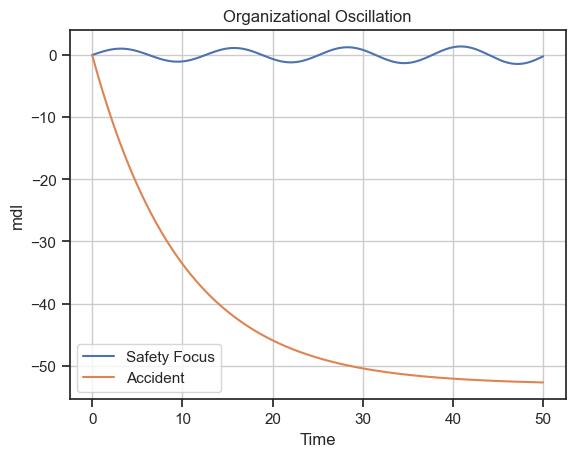

In [14]:
#Base Model
initial_condition = {
    # 'Pulse start time': 0, 
    # 'Pulse end time': 10, 
    # 'Pulse Quantity 1': 0, 
    # 'Pulse duration': 2, 
    # 'Pulse Time': 2,  
    # 'Pulse Quantity': 0, 
    # 'Switch': 0, 
    # 'Accident': 0, 
    'std deviation' :10, 
    'mean': 0,
    'seed' : 1, 
    'Acceptable Safety Boundary': 0, 
    'Time to adjust focus': 2, 
    'Normal NonSafety performance': 0,
    'Time to adjust focus': 2

    }
m1 = model.run(params= initial_condition)

m1['Safety Focus'].plot()
m1['Accident'].plot()
# m1['Serious Error'].plot()

plt.title("Organizational Oscillation") 
# plt.ylim(-1000, 1000)

plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()


## Pulse in 10 

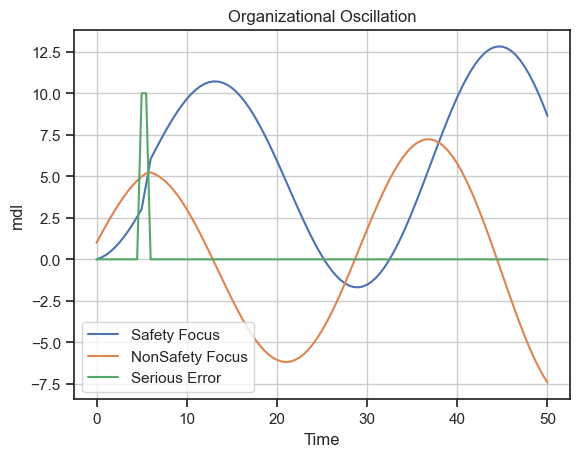

In [148]:
condition = {
    'Pulse start time': 1, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 5, 
    'Pulse Duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 5,
    
    }

m2 = model.run(params = condition)

m2['Safety Focus'].plot()
m2['NonSafety Focus'].plot()
m2['Serious Error'].plot()


plt.title("Organizational Oscillation") 
plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

## Pulse in 20

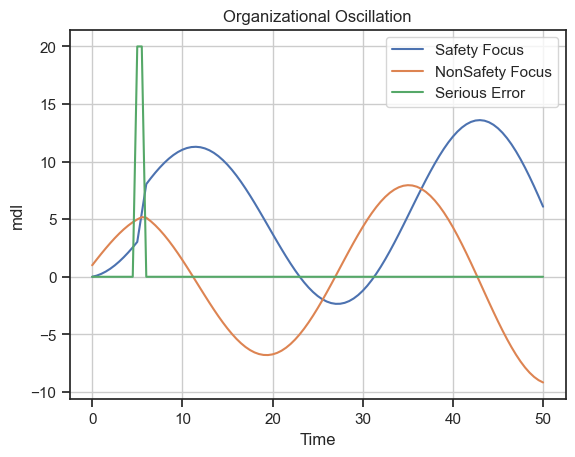

In [149]:
condition = {
    'Pulse start time': 1, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 10, 
    'Pulse Duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 5,
    
    }
m3 = model.run(params= condition)

m3['Safety Focus'].plot()
m3['NonSafety Focus'].plot()
m3['Serious Error'].plot()

plt.title("Organizational Oscillation") 
plt.ylabel("mdl")
plt.xlabel("Time")
# plt.ylim(-1500, 1500)

plt.legend()
plt.grid()

# Test 1. magnitude of the error incident. 

Testing different magnitude of the incident. According to XX, the larger the safety incident (Pulse Quantity), the longer the cycle. 

- Hypothesis: the larger the safety incident (Pulse Quantity), the larger the cycle time
- Condition: There is a pulse at time 5, with a duration of 1. 
- Result: Confirm 

#TODO find reference literature on the magnitude of the error incident. 


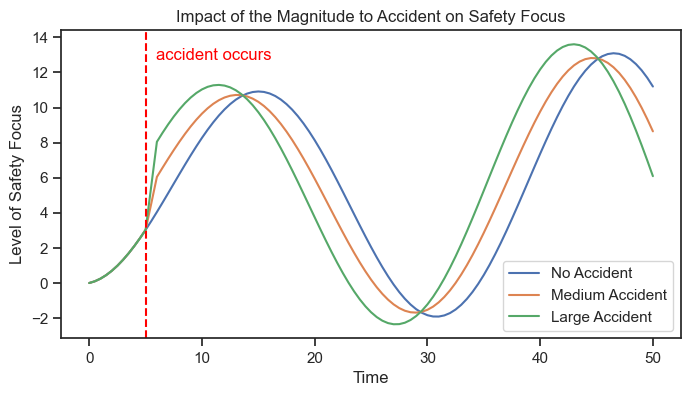

In [152]:
# Seaborn style 
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))

m1['Safety Focus'].plot(label = 'No Accident')
m2['Safety Focus'].plot(label = 'Medium Accident')
m3['Safety Focus'].plot(label = 'Large Accident')

plt.title("Impact of the Magnitude to Accident on Safety Focus")
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.grid()
plt.legend(loc='lower right')

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 13, "accident occurs", color='red', fontsize=12, ha='center', va='center')


plt.show()

# legend on the right low side 


# Test 1. Time to adjust focus 

Testing different time to adjust focus. According to XX, management style effects the timing the organization deals with adjusting to safety focus. The shorter the time to adjust focus, the faster the organization adapts. 

- Hypothesis: the longer it took to adjust focus, the longer the cycle runs.
- Condition: There is a pulse at time 5, with a duration of 1.
- Parameter: Time to adjust focus = [5, 10, 15]
- Result:  




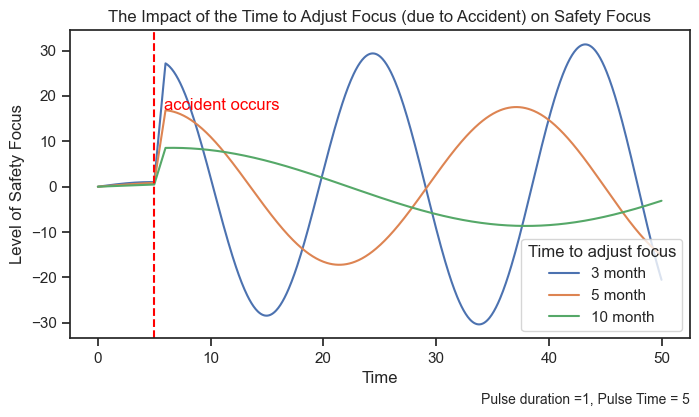

In [24]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))


initial_condition = {
    'Pulse start time': 0, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 5, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3
    }
m1 = model.run(params= initial_condition)

m1['Safety Focus'].plot(label = '3 month')

condition = {'Time to adjust focus': 5}
initial_condition.update(condition)

m2 = model.run(params= initial_condition)
m2['Safety Focus'].plot(label = '5 month')

condition = {'Time to adjust focus': 10}
initial_condition.update(condition)

m3 = model.run(params= condition)
m3['Safety Focus'].plot(label = '10 month')

plt.title("The Impact of the Time to Adjust Focus (due to Accident) on Safety Focus") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")

plt.legend(title= 'Time to adjust focus')

# Add a footnote below and to the right side of the chart
ax.annotate('Pulse duration =1, Pulse Time = 5',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 18, "accident occurs", color='red', fontsize=12, ha='center', va='center')

plt.legend(title = 'Time to adjust focus', loc='lower right')

plt.show()

# Test 3 

A firm who have a large shock v.s. A firm who has many small errors. 

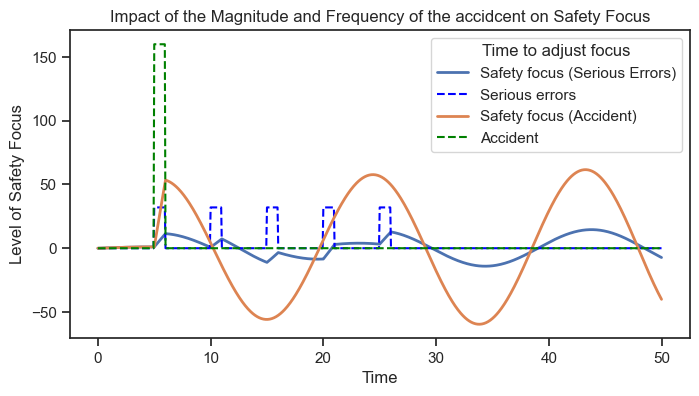

In [38]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))


condition1 = {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 2, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5
    }
m1 = model.run(params= condition1)

m1['Safety Focus'].plot(label = 'Safety focus (Serious Errors)', linewidth = 2)
m1['Serious Errors'].plot(label = 'Serious errors', linestyle = 'dashed', color = 'blue')


condition2= {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 10, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5
    }

m2 = model.run(params= condition2)
m2['Safety Focus'].plot(label = 'Safety focus (Accident)', linewidth = 2)
m2['Serious Errors'].plot(label = 'Accident', linestyle = 'dashed', color = 'green') 

plt.legend(title = 'Time to adjust focus', loc='upper right')

plt.title("Impact of the Magnitude and Frequency of the accidcent on Safety Focus") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.ylim(-1500, 1500)

plt.show()

## Test 4 Pink Noise 

Test using random variables. 

The excursion is a random variable determined by pink noise, the variability of which can be adjusted by varying the parameter standard deviation.

https://metasd.com/2010/03/pink-noise/ 


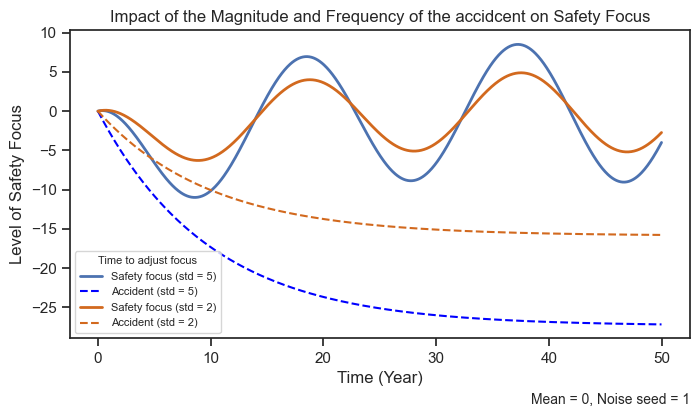

In [7]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))

plt.title("Impact of the Magnitude and Frequency of the accidcent on Safety Focus") 

condition1 = {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 1, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5, 
    'mean': 0, 
    'std deviation': 5
    }
m1 = model.run(params= condition1)

m1['Safety Focus'].plot(label = 'Safety focus (std = 5)', linewidth = 2)
m1['Accident'].plot(label = 'Accident (std = 5)', linestyle = 'dashed', color = 'blue')

condition2= {
  'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 1, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5, 
    'mean': 0, 
    'std deviation': 2
    }

m2 = model.run(params= condition2)
m2['Safety Focus'].plot(label = 'Safety focus (std = 2)', linewidth = 2, color = 'chocolate') 
m2['Accident'].plot(label = 'Accident (std = 2)', linestyle = 'dashed', color = 'chocolate') 

legend = plt.legend(title = 'Time to adjust focus', loc='lower left', fontsize = 8)#, bbox_to_anchor=(3, 1.05))
legend.get_title().set_fontsize('8') #legend 'Title' fontsize

plt.ylabel("Level of Safety Focus")
plt.xlabel("Time (Year)")
# plt.ylim(-1500, 1500)
ax.annotate('Mean = 0, Noise seed = 1',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.show()

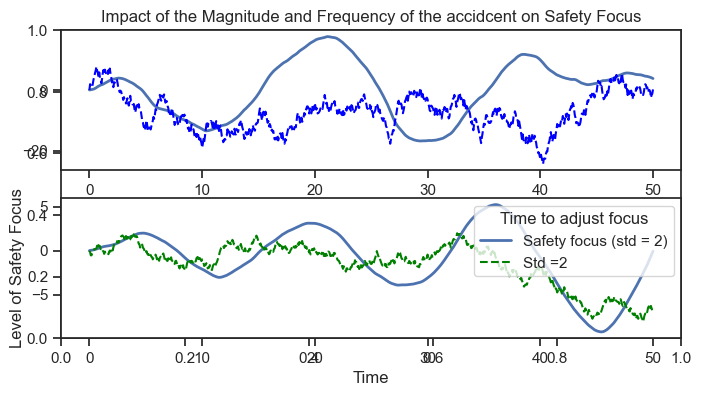

In [55]:
# sns.set_theme(style="ticks") 
# fig, ax = plt.subplots(figsize=(8,4))

# plt.subplot(2, 1, 1) # row 1, col 2 index 1
# plt.title("Impact of the Magnitude and Frequency of the accidcent on Safety Focus") 

# condition1 = {
#     'Pulse start time': 5, 
#     'Pulse end time': 30, 
#     'Pulse Quantity 1': 0, 
#     'Pulse duration': 1, 
#     'Pulse Time': 5,  
#     'Pulse Quantity': 0, 
#     'Switch': 1, 
#     'Time to adjust focus': 3, 
#     'Pulse repeat time': 5, 
#     'mean': 0, 
#     'std deviation': 10
#     }
# m1 = model.run(params= condition1)

# m1['Safety Focus'].plot(label = 'Safety focus (Serious Errors)', linewidth = 2)
# m1['Accident'].plot(label = 'Accident', linestyle = 'dashed', color = 'blue')

# plt.subplot(2, 1, 2) # row 1, col 2 index 1

# condition2= {
#   'Pulse start time': 5, 
#     'Pulse end time': 30, 
#     'Pulse Quantity 1': 0, 
#     'Pulse duration': 1, 
#     'Pulse Time': 5,  
#     'Pulse Quantity': 0, 
#     'Switch': 1, 
#     'Time to adjust focus': 3, 
#     'Pulse repeat time': 5, 
#     'mean': 0, 
#     'std deviation': 2
#     }

# m2 = model.run(params= condition2)
# m2['Safety Focus'].plot(label = 'Safety focus (std = 2)', linewidth = 2, sharey = ax1)
# m2['Accident'].plot(label = 'Std =2', linestyle = 'dashed', color = 'green') 

# plt.legend(title = 'Time to adjust focus', loc='upper right')

# plt.ylabel("Level of Safety Focus")
# plt.xlabel("Time")
# # plt.ylim(-1500, 1500)

# plt.show()